In [1]:
import sys
sys.path.append('..')
from py_models.geo_math import *
from py_models.draw_tools import draw_euclidean_spanner
from py_models.euclidean_spanner import EuclideanSpanner

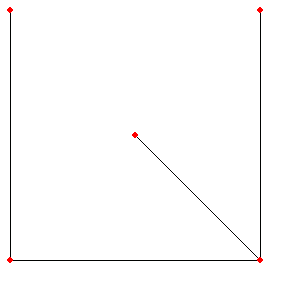

In [2]:
# A test
pointset = {'A': [1, 1], 'B': [-1, 1], 'C': [-1, -1], 'D': [1, -1], 'O': [0, 0]}
edges = [['A', 'B'],['A', 'D'],['C', 'B'], ['C', 'B'], ['O', 'A']]
spanner = EuclideanSpanner(pointset, edges)
draw_euclidean_spanner(spanner)

In [3]:
def print_stretch_info(spanner):
    print('Stretch-ratio: {}\nMax-stretch pair: {}'.format(spanner.stretch(), spanner.stretch_pair()))

## Clock Spanners

In [4]:
clock12 = {}
clock12['O'] = [0, 0]
clock12['12'] = [10, 0]
clock12['1'] = point_rotation(-np.pi/6, clock12['12'])
for i in range(2, 12):
    clock12[str(i)] = point_rotation(-np.pi/6, clock12[str(i-1)])
    
clock12_edges = [['12', '1'], ['O', '12'], ['O', '4'], ['O', '8'], ['1', '3'], ['5', '7'], ['9', '11']]
for i in range(1, 12):
    clock12_edges.append([str(i), str(i+1)])

In [5]:
clock12_spanner = EuclideanSpanner(clock12, clock12_edges)

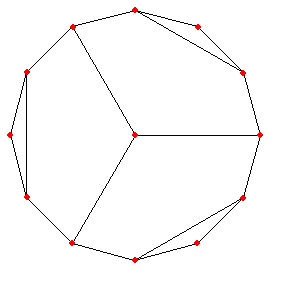

In [6]:
draw_euclidean_spanner(clock12_spanner)

In [17]:
print_stretch_info(clock12_spanner)

Stretch-ratio: 2.035276180410083
Max-stretch pair: ['2', 'O']


## Hexagons-are-the-bestagons spanners

In [8]:
hexagon_points = {'O': [0,    0],
           'A': [-0.5, np.sqrt(3)/2],
           'B': [0,    np.sqrt(3)],
           'C': [1,    np.sqrt(3)],
           'D': [1.5,  np.sqrt(3)/2],
           'E': [1,    0],
           'F': [1.5,  -np.sqrt(3)/2],
           'G': [1,    -np.sqrt(3)],
           'H': [0,    -np.sqrt(3)],
           'I': [-0.5, -np.sqrt(3)/2],
           'J': [-1.5, -np.sqrt(3)/2],
           'K': [-2, 0],
           'L': [-1.5, np.sqrt(3)/2]}
hexagon_conv = list(hexagon_points.keys())
hexagon_edges = [[hexagon_conv[i], hexagon_conv[i+1]] for i in range(len(hexagon_conv)-1)]
hexagon_edges.append(['L', 'A'])
hexagon_edges.append(['O', 'E'])
hexagon_edges.append(['O', 'I'])

In [9]:
hexagon_spanner = EuclideanSpanner(hexagon_points, hexagon_edges)

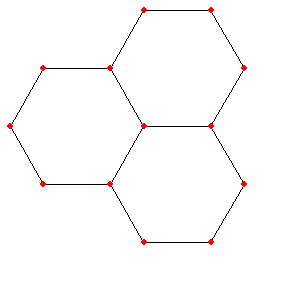

In [10]:
draw_euclidean_spanner(hexagon_spanner)

In [11]:
print_stretch_info(hexagon_spanner)

Stretch-ratio: 1.5000000000000002
Max-stretch pair: ['A', 'J']


In [12]:
hexagon_spanner.stretch_pair()

['A', 'J']

### Next step: Add a point in the middle of each outside edge to simulate incidences. It's not a complete proof of the maximum possible stretch ratio, but I strongly believe it will yield the correct result.

In [30]:
n_hexagon_points = {'O': [0,    0],
           'A': [-0.5, np.sqrt(3)/2],
           'B': [0,    np.sqrt(3)],
           'C': [1,    np.sqrt(3)],
           'D': [1.5,  np.sqrt(3)/2],
           'E': [1,    0],
           'F': [1.5,  -np.sqrt(3)/2],
           'G': [1,    -np.sqrt(3)],
           'H': [0,    -np.sqrt(3)],
           'I': [-0.5, -np.sqrt(3)/2],
           'J': [-1.5, -np.sqrt(3)/2],
           'K': [-2, 0],
           'L': [-1.5, np.sqrt(3)/2]}
alphabet_list = [chr(i) for i in range(ord('A'),ord('L')+1)]
alphabet_list.append('A')
for i in range(len(alphabet_list)-1):
    n_hexagon_points[alphabet_list[i] + '5'] =\
        (np.array(n_hexagon_points[alphabet_list[i]]) + np.array(n_hexagon_points[alphabet_list[i+1]]))/2

n_hexagon_conv = sorted(list(n_hexagon_points.keys()))[:-1]
n_hexagon_conv.append('A')
n_hexagon_edges = [[n_hexagon_conv[i], n_hexagon_conv[i+1]] for i in range(len(n_hexagon_conv)-1)]
n_hexagon_edges.append(['O', 'A'])
n_hexagon_edges.append(['O', 'E'])
n_hexagon_edges.append(['O', 'I'])
n_hexagon_edges

[['A', 'A5'],
 ['A5', 'B'],
 ['B', 'B5'],
 ['B5', 'C'],
 ['C', 'C5'],
 ['C5', 'D'],
 ['D', 'D5'],
 ['D5', 'E'],
 ['E', 'E5'],
 ['E5', 'F'],
 ['F', 'F5'],
 ['F5', 'G'],
 ['G', 'G5'],
 ['G5', 'H'],
 ['H', 'H5'],
 ['H5', 'I'],
 ['I', 'I5'],
 ['I5', 'J'],
 ['J', 'J5'],
 ['J5', 'K'],
 ['K', 'K5'],
 ['K5', 'L'],
 ['L', 'L5'],
 ['L5', 'A'],
 ['O', 'A'],
 ['O', 'E'],
 ['O', 'I']]

In [14]:
n_hexagon_spanner = EuclideanSpanner(n_hexagon_points, n_hexagon_edges)

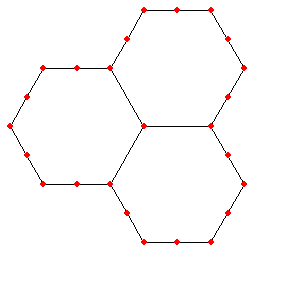

In [15]:
draw_euclidean_spanner(n_hexagon_spanner)

In [16]:
print_stretch_info(n_hexagon_spanner)

Stretch-ratio: 1.7320508075688774
Max-stretch pair: ['A5', 'D5']


In [19]:
n_hexagon_spanner.eucl_dist('A5', 'D5')

1.7320508075688772

### One step further...?

In [34]:
nn_hexagon_points = {'O': [0,    0],
           'A': [-0.5, np.sqrt(3)/2],
           'B': [0,    np.sqrt(3)],
           'C': [1,    np.sqrt(3)],
           'D': [1.5,  np.sqrt(3)/2],
           'E': [1,    0],
           'F': [1.5,  -np.sqrt(3)/2],
           'G': [1,    -np.sqrt(3)],
           'H': [0,    -np.sqrt(3)],
           'I': [-0.5, -np.sqrt(3)/2],
           'J': [-1.5, -np.sqrt(3)/2],
           'K': [-2, 0],
           'L': [-1.5, np.sqrt(3)/2]}
for t in range(5, 0, -1):
    points_to_split = sorted(list(nn_hexagon_points.keys()))[:-1]
    points_to_split.append('A')
    for i in range(len(points_to_split)-1):
        nn_hexagon_points[points_to_split[i] + str(t)] = 1/2 *\
            (np.array(nn_hexagon_points[points_to_split[i]]) +\
             np.array(nn_hexagon_points[points_to_split[i+1]]))

nn_hexagon_conv = sorted(list(nn_hexagon_points.keys()))[:-1]
nn_hexagon_conv.append('A')
nn_hexagon_edges = [[nn_hexagon_conv[i], nn_hexagon_conv[i+1]] for i in range(len(nn_hexagon_conv)-1)]
nn_hexagon_edges.append(['O', 'A'])
nn_hexagon_edges.append(['O', 'E'])
nn_hexagon_edges.append(['O', 'I'])

In [35]:
nn_hexagon_spanner = EuclideanSpanner(nn_hexagon_points, nn_hexagon_edges)

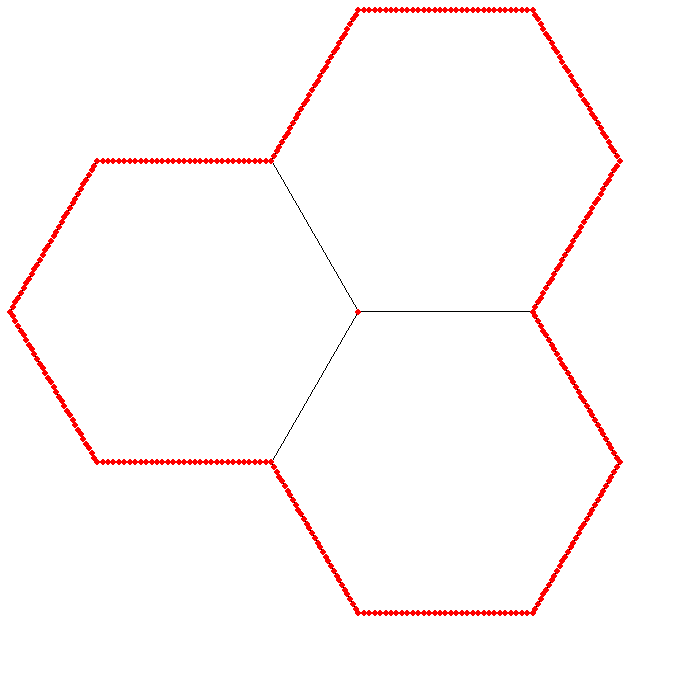

In [38]:
draw_euclidean_spanner(nn_hexagon_spanner, img_w = 700, img_h = 700)

In [37]:
print_stretch_info(nn_hexagon_spanner)

Stretch-ratio: 1.7320508075688774
Max-stretch pair: ['A5', 'D5']
